# Intro. to ML

#### My first ML_model - Prediction of House Prices

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Generate synthetic data
data = {'Size': [1400, 1600, 1700, 1875, 1100],
        'Price': [245000, 312000, 279000, 308000, 199000]} # in dollars

# creating a dataframe
df = pd.DataFrame(data)


In [4]:
# Splitting the data into X (independent) and y (dependent) variables
X = df[['Size']] # independent variable
y = df['Price'] # dependent variable

In [5]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) # 80% training and 20% testing data split. Random_state is used to set the seed for random number generator. This can be any integer.

print(X_train)
print(X_test)

print(y_train)
print(y_test)


   Size
0  1400
1  1600
3  1875
4  1100
   Size
2  1700
0    245000
1    312000
3    308000
4    199000
Name: Price, dtype: int64
2    279000
Name: Price, dtype: int64


In [6]:
# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # fitting the model on training data

LinearRegression()

In [7]:
# Making predictions
y_pred = model.predict(X_test) # predicting the values of y for the test data

print(y_pred) # predicted values of y

[297696.73330083]


In [8]:
# Evaluating the model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE is the square root of the mean of the squared errors. It is the most popular evaluation metric used in regression problems.

Mean Absolute Error: 18696.73330082884
Mean Squared Error: 349567836.12232214
Root Mean Squared Error: 18696.73330082884


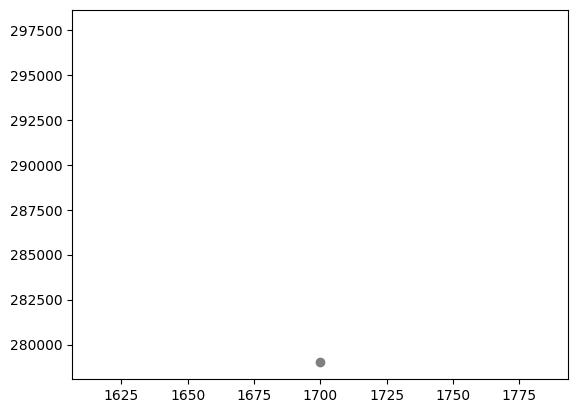

In [9]:
# Visualizing the model
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show() # The grey dots represent the actual values of y in the test data, and the red line represents the predicted values of y by the model. The line is the best fit line that minimizes the sum of squared errors.


## Regression

#### Linear Regression

##### Prediction of Disease Progression using Linear Regression

In this section, we will predict the progression of diabetes using the `load_diabetes` dataset from scikit-learn. The dataset contains 10 baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements, obtained for each of 442 diabetes patients, as well as the target variable, a quantitative measure of disease progression one year after baseline.

We will use a Linear Regression model to predict the disease progression based on these features. The steps involved are:

1. **Loading the Dataset**: We will load the diabetes dataset using the `datasets.load_diabetes` method from scikit-learn.
2. **Splitting the Data**: We will split the data into training and testing sets to evaluate the performance of our model.
3. **Training the Model**: We will train a Linear Regression model using the training data.
4. **Making Predictions**: We will use the trained model to make predictions on the test data.
5. **Evaluating the Model**: We will evaluate the performance of the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
6. **Visualizing the Results**: We will visualize the actual vs predicted values to understand the model's performance.

Let's proceed with the implementation.

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True) # returns the data and target variables in the dataset as X and y respectively

# Print the shape of X and y to understand the dimensions of the data
print(X.shape)
print(y.shape)
print(X[0])


(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [22]:
X = X[:, 2] # using only one feature for simplicity (feature at index 2)
X = X.reshape((-1,1)) # reshaping the data to a 2D array
print(X.shape)

(442, 1)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [25]:
# Create a linear regression model
diabetes_model = linear_model.LinearRegression()
diabetes_model.fit(X_train, y_train) # fitting the model on training data

LinearRegression()

In [26]:
# Make predictions
disease_predictions = diabetes_model.predict(X_test) # predicting the values of y for the test data

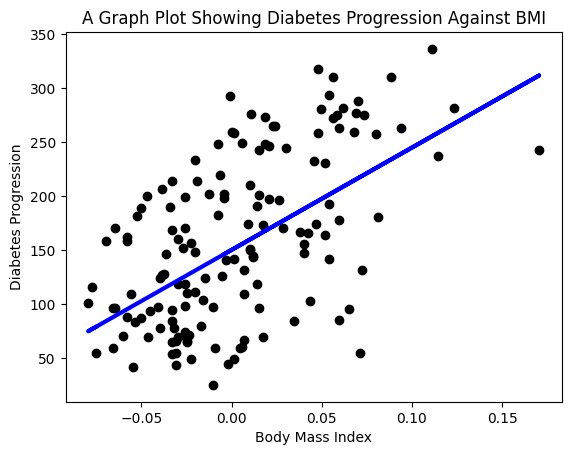

In [28]:
# plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, disease_predictions, color='blue', linewidth=3)
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show() # The black dots represent the actual values of y in the test data, and the blue line represents the predicted values of y by the model. The line is the best fit line that minimizes the sum of squared errors.

### Data Cleaning

#### Analyzing US Pumpkins Dataset

In this section, we will analyze the US Pumpkins dataset to extract the average price of pumpkins for each month of the year. This analysis will help us identify the best month to get a deal when buying pumpkins. The steps involved are:

1. **Loading the Dataset**: We will load the US Pumpkins dataset into a pandas DataFrame.
2. **Data Cleaning**: We will clean the dataset by handling missing values and converting data types as necessary.
3. **Extracting Month Information**: We will extract the month information from the date column.
4. **Calculating Average Price**: We will calculate the average price of pumpkins for each month.
5. **Visualizing the Results**: We will visualize the average price of pumpkins for each month to identify trends and patterns.

Let's proceed with the implementation.

In [1]:
import pandas as pd

# read the csv file
pumpkins = pd.read_csv('../data/US_pumpkins.csv')

# filter rows that don't use the 'price' per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)] # filtering rows that contain the word 'bushel' in the 'Package' column of the dataset and storing the result in the 'pumpkins' dataframe variable.
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# count how many empty values are in the dataset
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
# define the columns to be used
new_columns = ['Package', 'Variety','Month', 'Low Price', 'High Price', 'Date']

# drop all other columns
pumpkins = pumpkins.drop([colname for colname in pumpkins.columns if colname not in new_columns], axis=1)
# why axis=1? because we are dropping columns, not rows

In [4]:
# calculate the average between the low and high prices
price = (pumpkins['Low Price'] + pumpkins['High Price']) /2

# get the month from the date column
month  = pd.DatetimeIndex(pumpkins['Date']).month

# Extract 1 t0 365 days from the date column
from datetime import datetime

day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1 ,1)).days)

# create a new dataframe with the new columns
new_pumpkins = pd.DataFrame(
    {'Month': month,
     'DayOfYear': day_of_year,
     'Package': pumpkins['Package'],
     'Variety': pumpkins['Variety'], 
     'Low Price': pumpkins['Low Price'], 
     'High Price': pumpkins['High Price'], 
     'Price': price}
     )

new_pumpkins.head()


C:\Users\Youngmusty\AppData\Local\Temp\ipykernel_9400\1536984770.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1 ,1)).days)


,Month,DayOfYear,Package,Variety,Low Price,High Price,Price
70,9,267,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,15.0
71,9,267,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,18.0
72,10,274,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,18.0
73,10,274,1 1/9 bushel cartons,PIE TYPE,17.0,17.0,17.0
74,10,281,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,15.0


In [5]:
# convert the price of all cell prices by 1 1/9 bushels by dividing by 1 + 1/9
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = new_pumpkins['Price'] / (1 + 1/9)

# convert the price of all cell prices by 1/2 bushels by dividing by 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = new_pumpkins['Price'] / 0.5

new_pumpkins.head()

,Month,DayOfYear,Package,Variety,Low Price,High Price,Price
70,9,267,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,13.5
71,9,267,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,16.2
72,10,274,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,16.2
73,10,274,1 1/9 bushel cartons,PIE TYPE,17.0,17.0,15.3
74,10,281,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,13.5


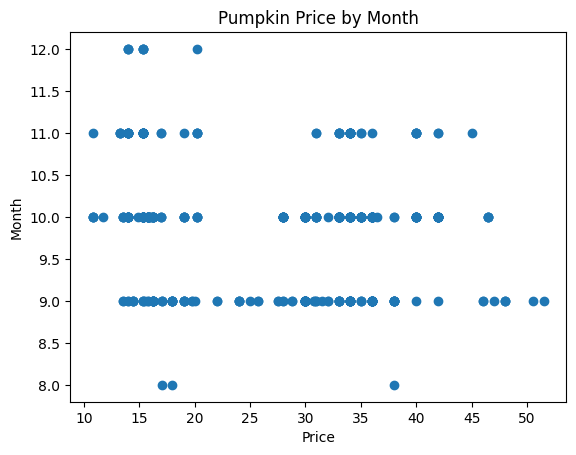

In [6]:
# Visualizing the cleaned data
import matplotlib.pyplot as plt

# get the values we wnat to plot
price = new_pumpkins.Price
month = new_pumpkins.Month

# create the plot
plt.scatter(price, month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.title('Pumpkin Price by Month')
plt.show()

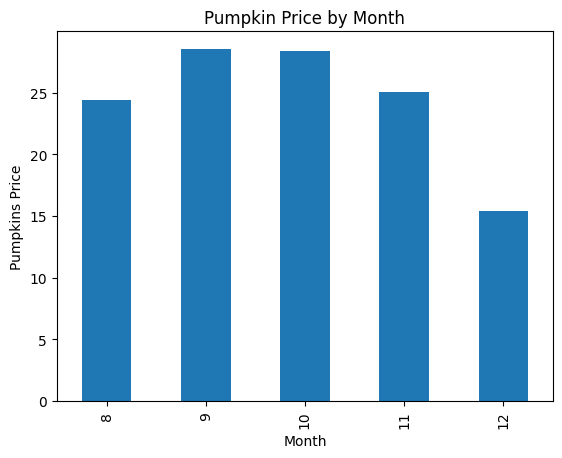

In [7]:
# Grouping the pupmkin data into a bar chart by month and price
new_pumpkins.groupby('Month')['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkins Price')
plt.title('Pumpkin Price by Month')
plt.show()


### Diving Deeper into Linear Regression

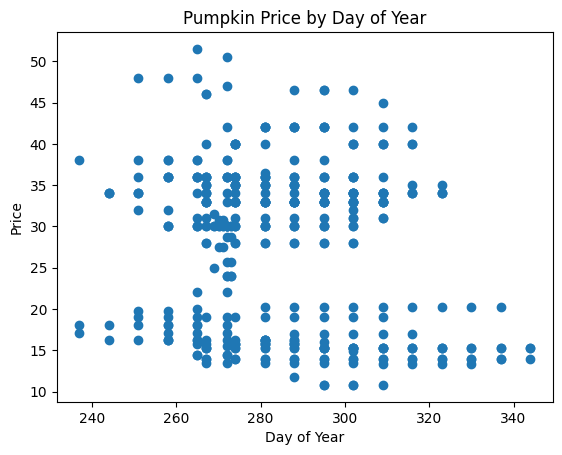

In [8]:
plt.scatter(new_pumpkins['DayOfYear'], new_pumpkins['Price'])
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.title('Pumpkin Price by Day of Year')
plt.show()

In [9]:
# compute the correlation between the price and the day of the year
correlation = new_pumpkins['DayOfYear'].corr(new_pumpkins['Price'])
print(correlation)

-0.16690092505934478


In [10]:
# print unique values in the 'Package' column
print(new_pumpkins['Variety'].unique())

['PIE TYPE' 'MINIATURE' 'FAIRYTALE' 'MIXED HEIRLOOM VARIETIES']


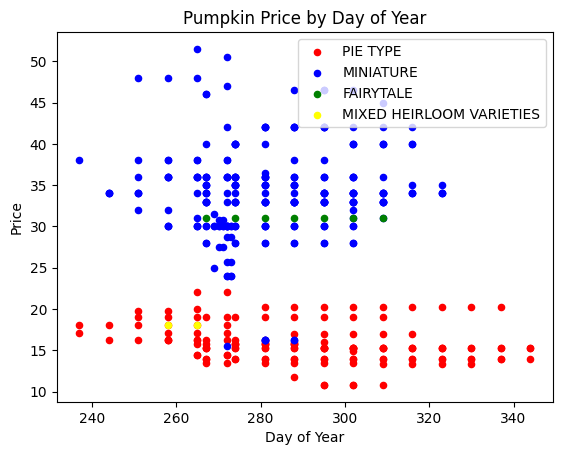

In [11]:
# define colors to plot the pumpkin data
color = ['red', 'blue', 'green', 'yellow']

# plot the pumpkin data by day of the year with different colors
ax = None
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot(x='DayOfYear', y='Price', kind='scatter', color=color[i], label=var, ax=ax)
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.title('Pumpkin Price by Day of Year')
plt.show()

# why is ax None?
# 

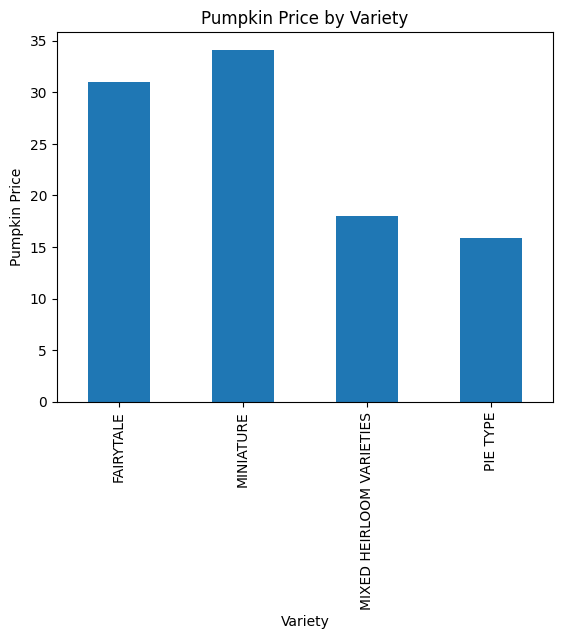

In [13]:
# groupby the pumpkin data by variety and plot the data
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')
plt.title('Pumpkin Price by Variety')
plt.show()

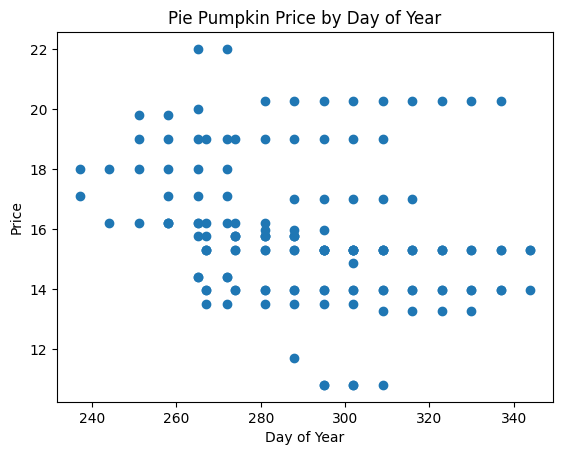

-0.26678559691441883


In [14]:
# filter the pumpkin data by pie type and plot the data
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
plt.scatter(pie_pumpkins['DayOfYear'], pie_pumpkins['Price'])
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.title('Pie Pumpkin Price by Day of Year')
plt.show()

print(pie_pumpkins['Price'].corr(pie_pumpkins['DayOfYear']))

In [16]:
from sklearn import linear_model, metrics, model_selection

# Get the Day of Year and Price columns
X = pie_pumpkins['DayOfYear'].values.reshape(-1,1)
y = pie_pumpkins['Price']

# print the shape of X and y
print(X.shape)
print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test =  model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression object
lin_reg = linear_model.LinearRegression()

# Train the model using the training data
lin_reg.fit(X_train,y_train)

(144, 1)
(144,)


LinearRegression()

In [17]:
# Predict using our test data
pred = lin_reg.predict(X_test)
pred

array([16.08011158, 16.61184698, 15.95603999, 15.21161044, 15.8319684 ,
       16.61184698, 16.08011158, 16.2396322 , 16.48777539, 15.70789681,
       15.70789681, 15.58382522, 16.08011158, 15.45975362, 16.32825477,
       15.58382522, 15.45975362, 15.95603999, 15.58382522, 16.2396322 ,
       16.73591857, 16.08011158, 15.08753885, 16.08011158, 15.70789681,
       16.32825477, 15.95603999, 15.70789681, 15.45975362])

In [18]:
import numpy as np
# To tell if the predictions are good, we can calculate the mean squared error
mse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# Print the Mean Sqaured Error in an easy to read format
print(f'Mean Error: {mse:3.3} ({(mse / np.mean(pred) * 100):3.3})%')

Mean Error: 2.76 (17.3)%


Another indictor of model quality is the coefficient of determination.
The value is between 0 and 1. The closer the value is to 1, the better the performance.

In [19]:
# Calculate the coefficient of determination
score = lin_reg.score(X_train, y_train)
print(f"Model determination: {score:.3f}")

Model determination: 0.045


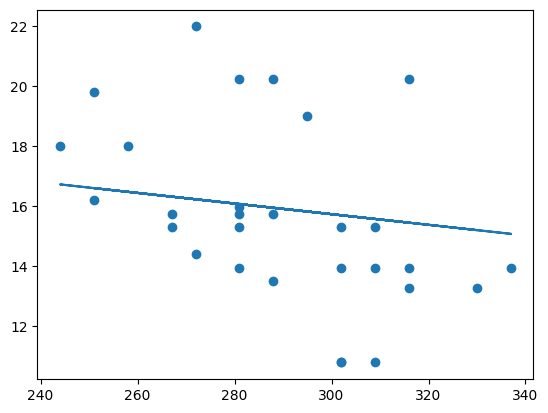

In [20]:
# creating a scatter plot using the test data
plt.scatter(X_test, y_test)

# Adding a line to the plot with prediction
plt.plot(X_test, pred)

### Polynomial Regression

Mean Error: 2.73 (17.2)%


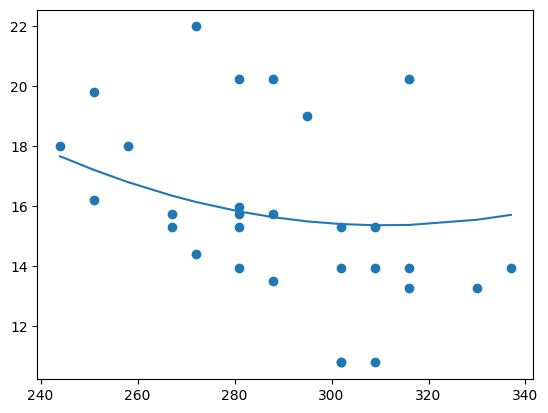

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Build a Polynomial regression pipeline
pipeline = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())

# use the pipeline to build the model
pipeline.fit(X_train, y_train)

# test the model with the test data
new_pred = pipeline.predict(X_test)

# Calculate and print mean squared error
mse = np.sqrt(metrics.mean_squared_error(y_test, new_pred))
print(f'Mean Error: {mse:3.3} ({(mse / np.mean(new_pred) * 100):3.3})%')

# creating a scatter plot using the test data
plt.scatter(X_test, y_test)

# Adding a line to the plot with prediction
plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))

In [22]:
# Calculate the coefficient of determination
score = pipeline.score(X_train, y_train)
print(f"Model determination: {score:.3f}")

Model determination: 0.075


#### Working with Categorical Variable

In [38]:
pumpkins.columns

Index(['Package', 'Variety', 'Date', 'Low Price', 'High Price'], dtype='object')

In [49]:
# Get the X value as a new dataframe with the month column, 
# along with Variety, City, and Package columns converted to categorical features
X_new = pd.get_dummies(new_pumpkins['Variety']) \
    .join(new_pumpkins['Month']) \
    .join(pd.get_dummies(new_pumpkins['Package']))

# get the y value as the Price
y_new = new_pumpkins['Price']

In [63]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, y_new, test_size=0.2, random_state=0)
new_model = linear_model.LinearRegression()
new_model.fit(X_train, y_train)

new_pred_2 = new_model.predict(X_test)

new_mse_2 = np.sqrt(metrics.mean_squared_error(y_test, new_pred_2))
print(f'Mean Error: {mse:3.3} ({((mse / np.mean(new_pred_2) )* 100):3.3})%')

# Calculate the coefficient of determination
score = new_model.score(X_train, y_train)
print(f"Model determination: {score:.3f}")

Mean Error: 2.73 (10.3)%
Model determination: 0.878


In [65]:
# Adding a polynomial feature after converting the some of the features to categorical feature

new_pipeline = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
new_pipeline.fit(X_train, y_train)

pred_pipeline = new_pipeline.predict(X_test)

mse_pipeline = np.sqrt(metrics.mean_squared_error(y_test, pred_pipeline))
print(f'Mean Error: {mse_pipeline:3.3} ({((mse_pipeline / np.mean(pred_pipeline) )* 100):3.3})%')

# Calculate the coefficient of determination
score = new_pipeline.score(X_train, y_train)
print(f"Model determination: {score:.3f}")

Mean Error: 3.43 (13.0)%
Model determination: 0.889
